In [1]:
from IPython.core.display import Javascript
Javascript(
    data='style_cells();',
    lib='http://www.phys.cwru.edu/courses/p250/notebook_style/style_assignment.js',
    css='http://www.phys.cwru.edu/courses/p250/notebook_style/assignment.css'
)

<IPython.core.display.Javascript object>

In [2]:
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.optimize as opt
from matplotlib import mlab
import scipy.special as sf
import scipy.linalg as la
import urllib.request
import pandas as pd
import numpy as np
import math
import csv
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Parrilla/Desktop/Geant4/geant4_10_04_p02/examples/Salt-Cavern/SaltMineDetector-build/Release/Run1DataGamma_nt_Data.csv', skiprows=range(0,21),
                 names = ["Energy Deposited (MeV)", "Track Length", "Starting Point (mm)", "End Point (mm)", "Event Number", "Event Number (step)", "Pre-Step X (mm)", 
                          "Pre-Step Y (mm)", "Pre-Step Z (mm)", "Post-Step X (mm)", "Post-Step Y (mm)", "Post-Step Z (mm)", "Momentum X", "Momentum Y", "Momentum Z", "Is Primary? (0=Yes)", "Charge"])
df

,Energy Deposited (MeV),Track Length,Starting Point (mm),End Point (mm),Event Number,Event Number (step),Pre-Step X (mm),Pre-Step Y (mm),Pre-Step Z (mm),Post-Step X (mm),Post-Step Y (mm),Post-Step Z (mm),Momentum X,Momentum Y,Momentum Z,Is Primary? (0=Yes),Charge
0,0.00000,0.0,0.00,0.00,0,0,-4512.13,-6613.22,0.00000,-4689.84,-6691.44,85.77850,-0.155367,-0.939295,-0.305919,0,0
1,0.00000,0.0,0.00,0.00,0,0,-4689.84,-6691.44,85.77850,-4712.44,-6828.10,41.27140,0.987331,-0.158180,-0.012511,0,0
2,0.00000,0.0,0.00,0.00,0,0,-4712.44,-6828.10,41.27140,-4579.19,-6849.44,39.58300,-0.411391,-0.173323,-0.894828,0,0
3,0.00000,0.0,0.00,0.00,0,0,-4579.19,-6849.44,39.58300,-4582.90,-6851.01,31.51370,-0.005331,-0.204614,-0.978828,0,0
4,0.00000,0.0,0.00,0.00,0,0,-4582.90,-6851.01,31.51370,-4582.97,-6853.61,19.04420,-0.355801,-0.052626,0.933079,0,0
5,0.00000,0.0,0.00,0.00,0,0,-4582.97,-6853.61,19.04420,-4610.08,-6857.62,90.14340,-0.243432,0.917431,-0.314739,0,0
6,0.00000,0.0,0.00,0.00,0,0,-4610.08,-6857.62,90.14340,-4616.33,-6834.06,82.05830,0.279341,-0.795858,0.537196,0,0
7,0.00000,0.0,0.00,0.00,0,0,-4616.33,-6834.06,82.05830,-4611.04,-6849.14,92.23800,-0.268316,0.917849,-0.292504,0,0
8,0.00000,0.0,0.00,0.00,0,0,-4611.04,-6849.14,92.23800,-4611.83,-6846.45,91.38180,0.705676,-0.707812,0.032004,0,0
9,0.00000,0.0,0.00,0.00,0,0,-4611.83,-6846.45,91.38180,-4605.94,-6852.36,91.64880,-0.241575,-0.963738,0.113364,0,0


In [4]:
# Make seperate variables for all data columns
Edep = df[[0]]["Energy Deposited (MeV)"]
Tr_len = df[[1]]["Track Length"]
startpt = df[[2]]["Starting Point (mm)"]
endpts = df[[3]]["End Point (mm)"]
eventlabels = df[[4]]["Event Number"]
steplabels = df[[5]]["Event Number (step)"]
prex = df[[6]]["Pre-Step X (mm)"]
prey = df[[7]]["Pre-Step Y (mm)"]
prez = df[[8]]["Pre-Step Z (mm)"]
postx = df[[9]]["Post-Step X (mm)"]
posty = df[[10]]["Post-Step Y (mm)"]
postz = df[[11]]["Post-Step Z (mm)"]
momx = df[[12]]["Momentum X"]
momy = df[[13]]["Momentum Y"]
momz = df[[14]]["Momentum Z"]
isprim = df[[15]]["Is Primary? (0=Yes)"]
charge = df[[16]]["Charge"]

In [5]:
# Subset event data which meets energy deposition requirements & Reset dataframe indexing
events_cut = np.where((Edep >= 0.81) & (Edep <= 0.85))[0]
Edep_cut = Edep[events_cut].reset_index(drop=True)
Tr_len_cut = Tr_len[events_cut].reset_index(drop=True)
startpt_cut = startpt[events_cut].reset_index(drop=True)
endpts_cut = endpts[events_cut].reset_index(drop=True)
eventlabels_cut = eventlabels[events_cut].reset_index(drop=True)

# Find where step data matches event labels that satisfy cuts
lf = []
for i in range(len(eventlabels_cut)):
    lf.extend(np.where(steplabels == eventlabels_cut[i])[0])

In [6]:
# Subset Step Data
steplabels_cut = steplabels[lf].reset_index(drop=True)
prex_cut = prex[lf].reset_index(drop=True)
prey_cut = prey[lf].reset_index(drop=True)
prez_cut = prez[lf].reset_index(drop=True)
postx_cut = postx[lf].reset_index(drop=True)
posty_cut = posty[lf].reset_index(drop=True)
postz_cut = postz[lf].reset_index(drop=True)
momx_cut = momx[lf].reset_index(drop=True)
momy_cut = momy[lf].reset_index(drop=True)
momz_cut = momz[lf].reset_index(drop=True)
isprim_cut = isprim[lf].reset_index(drop=True)
charge_cut = charge[lf].reset_index(drop=True)

Percentage of particles that satisfy cuts:
0.544
Number of events that satisfy cuts:
272


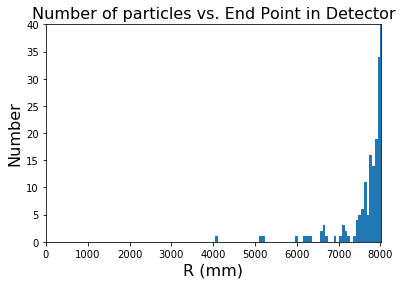

In [13]:
evtnb = eventlabels[len(eventlabels)-1] + 1 #number of events in run
percentage = len(events_cut) / evtnb * 100
print("Percentage of particles that satisfy cuts:")
print(percentage)
print("Number of events that satisfy cuts:")
print(len(events_cut))
a = np.hstack(endpts_cut)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Number of particles vs. End Point in Detector", fontsize=16)
plt.xlabel('R (mm)', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.axis([0, 8010, 0, 40])
plt.show()

In [14]:
# Subset step data again so that the first step is in the detector
rvector = np.sqrt(abs(prex_cut)**2+abs(prey_cut)**2)
found = np.where(rvector <= 8000)[0]
steplabels_cut_cut = steplabels_cut[found].reset_index(drop=True)
prex_cut_cut = prex_cut[found].reset_index(drop=True)
prey_cut_cut = prey_cut[found].reset_index(drop=True)
prez_cut_cut = prez_cut[found].reset_index(drop=True)
postx_cut_cut = postx_cut[found].reset_index(drop=True)
posty_cut_cut = posty_cut[found].reset_index(drop=True)
postz_cut_cut = postz_cut[found].reset_index(drop=True)
momx_cut_cut = momx_cut[found].reset_index(drop=True)
momy_cut_cut = momy_cut[found].reset_index(drop=True)
momz_cut_cut = momz_cut[found].reset_index(drop=True)
isprim_cut_cut = isprim_cut[found].reset_index(drop=True)
charge_cut_cut = charge_cut[found].reset_index(drop=True)

In [15]:
# Parse data to find vector starting and end points 
xi_list = []
xf_list = []
yi_list = []
yf_list = []
zi_list = []
zf_list = []

foundx = []
foundy = []
foundz = []
fcharge = []
foundxi = []
foundyi = []
foundzi = []
foundxf = []
foundyf = []
foundzf = []
fchargef = []

for i in range(evtnb):
    if np.where(steplabels_cut_cut == i)[0] != []:
        foundx.append(np.where(steplabels_cut_cut == i)[0])
        foundy.append(np.where(steplabels_cut_cut == i)[0])
        foundz.append(np.where(steplabels_cut_cut == i)[0])
        fcharge.append(np.where(steplabels_cut_cut == i)[0])
for i in range(len(foundx)):
    foundxi.append(foundx[i][0])
    foundxf.append(foundx[i][-1])
    foundyi.append(foundy[i][0])
    foundyf.append(foundy[i][-1])
    foundzi.append(foundz[i][0])
    foundzf.append(foundz[i][-1])
    fchargef.append(fcharge[i][0])
for i in range(len(foundxi)):
    xi_list.append(prex_cut_cut[foundxi[i]])
    yi_list.append(prey_cut_cut[foundyi[i]])
    zi_list.append(prez_cut_cut[foundzi[i]])
    xf_list.append(postx_cut_cut[foundxf[i]])
    yf_list.append(posty_cut_cut[foundyf[i]])
    zf_list.append(postz_cut_cut[foundzf[i]])

C:\Users\Parrilla\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


In [16]:
# Construct Electron vector and Radial vector
vrlist = np.zeros((len(xi_list), 2))
vzlist = np.zeros((len(xi_list), 2))
rlist = np.zeros((len(xi_list), 2))
zlist = np.zeros((len(xi_list), 2))

for i in range(len(vrlist)):
    vrlist[i][0] = xf_list[i] - xi_list[i]
    vrlist[i][1] = yf_list[i] - yi_list[i]
    vzlist[i][0] = xf_list[i] - xi_list[i]
    vzlist[i][1] = zf_list[i] - zi_list[i]
    rlist[i][0] = -1 * xi_list[i] 
    rlist[i][1] = -1 * yi_list[i]
    zlist[i][0] = 1
    zlist[i][1] = -1

In [17]:
rtheta = np.zeros(len(vrlist))
ztheta = np.zeros(len(vrlist))

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))

for i in range(len(vrlist)):
    rtheta[i] = angle(vrlist[i], rlist[i])
    ztheta[i] = angle(vzlist[i], zlist[i])

C:\Users\Parrilla\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


ValueError: range parameter must be finite.

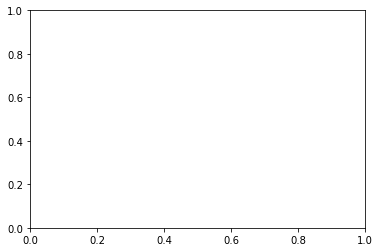

In [18]:
a = np.hstack(abs(rtheta))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.axis([0, 360, 0, 150])
plt.xlabel('Radial Deflection Angle (deg)', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.show()

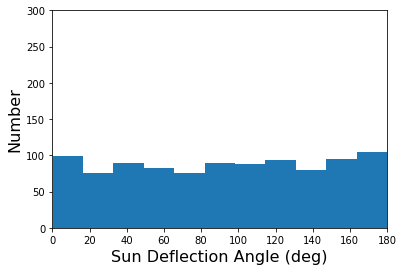

In [62]:
a = np.hstack(abs(ztheta))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.xlabel('Sun Deflection Angle (deg)', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.axis([0, 180, 0, 300])
plt.show()

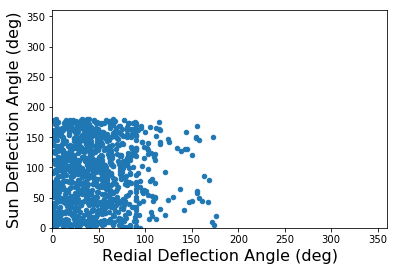

In [63]:
plt.scatter(abs(rtheta), abs(ztheta), s=20)
plt.axis([0, 360, 0, 360])
plt.xlabel('Redial Deflection Angle (deg)', fontsize=16)
plt.ylabel('Sun Deflection Angle (deg)', fontsize=16)
plt.show()

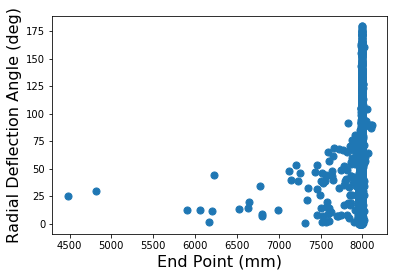

In [1273]:
plt.scatter(endpts_cut, rtheta, s=50)
plt.xlabel('End Point (mm)', fontsize=16)
plt.ylabel('Radial Deflection Angle (deg)', fontsize=16)
plt.show()

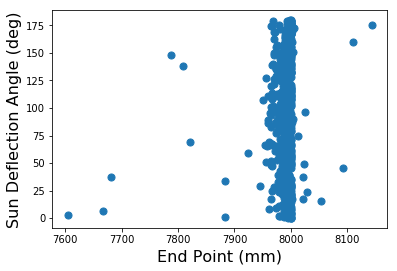

In [1154]:
plt.scatter(endpts_cut, ztheta, s=50)
plt.xlabel('End Point (mm)', fontsize=16)
plt.ylabel('Sun Deflection Angle (deg)', fontsize=16)
plt.show()

In [1155]:
thetamax = np.max(rtheta)
foundmax = np.where(rtheta==thetamax)[0][0]
rangef = fcharge[foundmax]
charge[rangef]

4694   -1
4695   -1
4696   -1
4697   -1
4698   -1
4699   -1
4700   -1
4701   -1
4702   -1
4703    0
4704   -1
4705   -1
4706   -1
4707   -1
Name: Charge, dtype: int64

In [1156]:
import heapq
thetamax2 = heapq.nlargest(2, rtheta)[1]
foundmax2 = np.where(rtheta==thetamax2)[0][0]
rangef2 = fcharge[foundmax2]
charge[rangef2]

2543   -1
2544   -1
2545   -1
2546   -1
2547   -1
2548   -1
2549    0
2550   -1
2551   -1
2552   -1
2553   -1
Name: Charge, dtype: int64

In [1157]:
import heapq
thetamax2 = heapq.nlargest(50, rtheta)[49]
foundmax2 = np.where(rtheta==thetamax2)[0][0]
rangef2 = fcharge[foundmax2]
charge[rangef2]

71   -1
72   -1
73   -1
74   -1
75   -1
76   -1
77    0
Name: Charge, dtype: int64

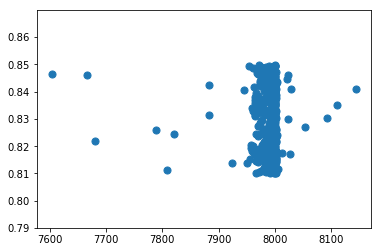

In [1158]:
plt.scatter(endpts_cut, Edep_cut, s=50)

plt.show()